<a href="https://colab.research.google.com/github/danipel/Compu-blanda/blob/main/ACO_vs_TSPLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación de desempeño:

# Implementación algoritmo colonia de hormigas vs literatura TSPLIB

In [ ]:
# Librerías
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Cargar las instancias

In [ ]:
# Cargamos el repositorio
! git clone https://github.com/rhgrant10/tsplib95.git

Cloning into 'tsplib95'...
remote: Enumerating objects: 1189, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 1189 (delta 113), reused 104 (delta 104), pack-reused 1064 (from 1)
Receiving objects: 100% (1189/1189), 7.06 MiB | 7.25 MiB/s, done.
Resolving deltas: 100% (659/659), done.


In [ ]:
# Revisamos las instancias disponibles (hay instancias tanto de 2 como de 3 dim)
! ls tsplib95/archives/problems/tsp

a280.tsp      d18512.tsp     gr120.tsp	  kroB200.tsp	pr107.tsp   rl11849.tsp  u2152.tsp
ali535.tsp    d198.tsp	     gr137.tsp	  kroC100.tsp	pr124.tsp   rl1304.tsp	 u2319.tsp
att48.tsp     d2103.tsp      gr17.tsp	  kroD100.tsp	pr136.tsp   rl1323.tsp	 u574.tsp
att532.tsp    d493.tsp	     gr202.tsp	  kroE100.tsp	pr144.tsp   rl1889.tsp	 u724.tsp
bayg29.tsp    d657.tsp	     gr21.tsp	  lin105.tsp	pr152.tsp   rl5915.tsp	 ulysses16.tsp
bays29.tsp    dantzig42.tsp  gr229.tsp	  lin318.tsp	pr226.tsp   rl5934.tsp	 ulysses22.tsp
berlin52.tsp  dsj1000.tsp    gr24.tsp	  linhp318.tsp	pr2392.tsp  si1032.tsp	 usa13509.tsp
bier127.tsp   eil101.tsp     gr431.tsp	  nrw1379.tsp	pr264.tsp   si175.tsp	 vm1084.tsp
brazil58.tsp  eil51.tsp      gr48.tsp	  p654.tsp	pr299.tsp   si535.tsp	 vm1748.tsp
brd14051.tsp  eil76.tsp      gr666.tsp	  pa561.tsp	pr439.tsp   st70.tsp	 xray14012_1.tsp
brg180.tsp    fl1400.tsp     gr96.tsp	  pcb1173.tsp	pr76.tsp    swiss42.tsp  xray14012_2.tsp
burma14.tsp   fl1577.tsp     hk48.ts

In [ ]:
# Visualizamos el primero para ver su contenido
with open('tsplib95/archives/problems/tsp/a280.tsp', 'r') as f:
  data = f.readlines()
print(data)
print(type(data))

['NAME : a280\n', 'COMMENT : drilling problem (Ludwig)\n', 'TYPE : TSP\n', 'DIMENSION: 280\n', 'EDGE_WEIGHT_TYPE : EUC_2D\n', 'NODE_COORD_SECTION\n', '  1 288 149\n', '  2 288 129\n', '  3 270 133\n', '  4 256 141\n', '  5 256 157\n', '  6 246 157\n', '  7 236 169\n', '  8 228 169\n', '  9 228 161\n', ' 10 220 169\n', ' 11 212 169\n', ' 12 204 169\n', ' 13 196 169\n', ' 14 188 169\n', ' 15 196 161\n', ' 16 188 145\n', ' 17 172 145\n', ' 18 164 145\n', ' 19 156 145\n', ' 20 148 145\n', ' 21 140 145\n', ' 22 148 169\n', ' 23 164 169\n', ' 24 172 169\n', ' 25 156 169\n', ' 26 140 169\n', ' 27 132 169\n', ' 28 124 169\n', ' 29 116 161\n', ' 30 104 153\n', ' 31 104 161\n', ' 32 104 169\n', ' 33  90 165\n', ' 34  80 157\n', ' 35  64 157\n', ' 36  64 165\n', ' 37  56 169\n', ' 38  56 161\n', ' 39  56 153\n', ' 40  56 145\n', ' 41  56 137\n', ' 42  56 129\n', ' 43  56 121\n', ' 44  40 121\n', ' 45  40 129\n', ' 46  40 137\n', ' 47  40 145\n', ' 48  40 153\n', ' 49  40 161\n', ' 50  40 169\n', 

In [ ]:
def load_instance(file_name):
  # leer el archivo
  with open(file_name, 'r') as f:
    data = f.readlines()
  # Extraer las coordenadas
  node_coord_section = False
  coords = []
  for line in data:
    if line.strip() == "NODE_COORD_SECTION":
      node_coord_section = True
    elif line.strip() == "EOF":
      break
    elif node_coord_section:
      values = line.strip().split()
      if len(values) == 4:  # Caso de 3 dimensiones
        _, x, y, z = values
        coords.append((float(x), float(y), float(z)))
      elif len(values) == 3:  # Caso de 2 dimensiones
        _, x, y = values
        coords.append((float(x), float(y)))
  return np.array(coords)


example = load_instance('tsplib95/archives/problems/tsp/a280.tsp')
print(type(example))
print(example)

<class 'numpy.ndarray'>
[[288. 149.]
 [288. 129.]
 [270. 133.]
 [256. 141.]
 [256. 157.]
 [246. 157.]
 [236. 169.]
 [228. 169.]
 [228. 161.]
 [220. 169.]
 [212. 169.]
 [204. 169.]
 [196. 169.]
 [188. 169.]
 [196. 161.]
 [188. 145.]
 [172. 145.]
 [164. 145.]
 [156. 145.]
 [148. 145.]
 [140. 145.]
 [148. 169.]
 [164. 169.]
 [172. 169.]
 [156. 169.]
 [140. 169.]
 [132. 169.]
 [124. 169.]
 [116. 161.]
 [104. 153.]
 [104. 161.]
 [104. 169.]
 [ 90. 165.]
 [ 80. 157.]
 [ 64. 157.]
 [ 64. 165.]
 [ 56. 169.]
 [ 56. 161.]
 [ 56. 153.]
 [ 56. 145.]
 [ 56. 137.]
 [ 56. 129.]
 [ 56. 121.]
 [ 40. 121.]
 [ 40. 129.]
 [ 40. 137.]
 [ 40. 145.]
 [ 40. 153.]
 [ 40. 161.]
 [ 40. 169.]
 [ 32. 169.]
 [ 32. 161.]
 [ 32. 153.]
 [ 32. 145.]
 [ 32. 137.]
 [ 32. 129.]
 [ 32. 121.]
 [ 32. 113.]
 [ 40. 113.]
 [ 56. 113.]
 [ 56. 105.]
 [ 48.  99.]
 [ 40.  99.]
 [ 32.  97.]
 [ 32.  89.]
 [ 24.  89.]
 [ 16.  97.]
 [ 16. 109.]
 [  8. 109.]
 [  8.  97.]
 [  8.  89.]
 [  8.  81.]
 [  8.  73.]
 [  8.  65.]
 [  8.  57.]
 

## Funciones

In [ ]:
# Funciones
def distnce(coord1, coord2):
  return np.sqrt(np.sum((coord1 - coord2)**2))

def matriz_dist(nodos):
  no = nodos.shape[0]
  dij = np.zeros([no, no])
  for i in range(no):
    for j in range(no):
      dij[i, j] = distnce(nodos[i], nodos[j])
  return dij

def normalize_coords(coords):
  min_coords = np.min(coords, axis=0)
  max_coords = np.max(coords, axis=0)
  normalized_coords = (coords - min_coords) / (max_coords - min_coords)
  return normalized_coords

# Función de visualización para 2D y 3D
def visualizar_caminos(cities, best_path, best_p_len, is_3d=False):
  if is_3d:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for i, (x, y, z) in enumerate(cities):
      ax.plot([x], [y], [z], 'bo')
      ax.text(x, y, z, f'City {i}', fontsize=10, ha='right', color='darkred')

    for i in range(len(best_path) - 1):
      start_city = best_path[i]
      next_city = best_path[i + 1]
      ax.plot(
        [cities[start_city][0], cities[next_city][0]],
        [cities[start_city][1], cities[next_city][1]],
        [cities[start_city][2], cities[next_city][2]], 'k--', lw=1.5
      )

    ax.plot(
      [cities[best_path[-1]][0], cities[best_path[0]][0]],
      [cities[best_path[-1]][1], cities[best_path[0]][1]],
      [cities[best_path[-1]][2], cities[best_path[0]][2]], 'k--', lw=1.5
    )
    ax.set_title(f'Mejor recorrido (longitud: {np.round(best_p_len, 2)})')
    ax.set_xlabel('Coordenada X')
    ax.set_ylabel('Coordenada Y')
    ax.set_zlabel('Coordenada Z')
  else:
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(cities):
      plt.plot(x, y, 'bo')
      #plt.text(x, y, f'City {i}', fontsize=10, ha='right', color='darkred')

    for i in range(len(best_path) - 1):
      start_city = best_path[i]
      next_city = best_path[i + 1]
      plt.plot([cities[start_city][0], cities[next_city][0]], [cities[start_city][1], cities[next_city][1]], 'k--', lw=1.5)

    plt.plot([cities[best_path[-1]][0], cities[best_path[0]][0]], [cities[best_path[-1]][1], cities[best_path[0]][1]], 'k--', lw=1.5)

    plt.title(f'Mejor recorrido (longitud: {np.round(best_p_len, 2)})')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid()
  plt.show()

In [ ]:
#------------------------------------------------------------------------------#
# Primera versión: Uso de bucles
#------------------------------------------------------------------------------#
def colonia_de_hormigas(cities, alpha=2, beta=2, evaporation_rate=0.5, delta=0.5, max_iterations=100, n_ants=10):
  # Determina si las ciudades están en 2D o 3D
  is_3d = cities.shape[1] == 3

  # Inicializar feromonas y distancias
  n_cities = len(cities)
  tho = np.ones([n_cities, n_cities])
  dij = matriz_dist(cities)

  # Variables para almacenar el mejor camino encontrado
  best_path = []
  best_p_len = np.inf

  for iter in range(max_iterations):
    paths = []
    path_lens = []
    for ant in range(n_ants):
      # Inicializar visita y el camino de la hormiga
      S = np.zeros(n_cities)
      current_city = np.random.randint(n_cities)
      S[current_city] = 1
      path = [current_city]
      path_len = 0

      # Construir el camino de la hormiga
      while 0 in S:
        unvisited_cities = np.where(S == 0)[0]
        prob_ij = np.zeros(len(unvisited_cities))
        for j, unvisited_city in enumerate(unvisited_cities):
          prob_ij[j] = (tho[current_city, unvisited_city]**alpha) / (1 / (dij[current_city, unvisited_city] + 1e-10))**beta  # Evitar divide/0
        prob_ij /= sum(prob_ij)

        # Escoger la siguiente ciudad
        next_city = np.random.choice(unvisited_cities, p=prob_ij)
        S[next_city] = 1
        path.append(next_city)
        path_len += dij[current_city, next_city]
        current_city = next_city
      paths.append(path)
      path_lens.append(path_len)

    # Determinar el mejor camino de esta iteración
    best_iteration_path = paths[np.argmin(path_lens)]
    best_iteration_len = np.min(path_lens)

    if best_iteration_len < best_p_len:
      best_p_len = best_iteration_len
      best_path = best_iteration_path

    # Actualizar feromonas
    tho *= (1 - evaporation_rate)
    for path, path_len in zip(paths, path_lens):
      for i in range(n_cities - 1):
        tho[path[i], path[i + 1]] += delta / path_len
      tho[path[-1], path[0]] += delta / path_len  # Último trayecto

  return best_path, best_p_len, is_3d

Tiempo de ejecución del algoritmo: 1 minutos y 23.02 segundos


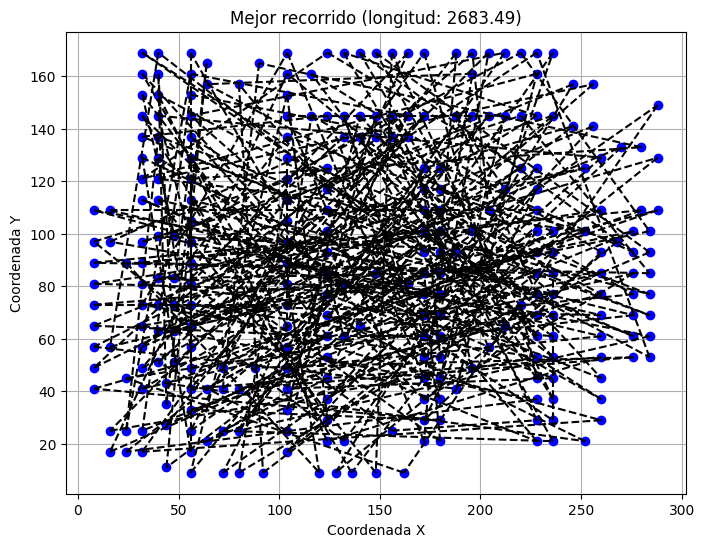

In [ ]:
# Prueba
nodos = load_instance('tsplib95/archives/problems/tsp/a280.tsp')

normalized_cities = normalize_coords(nodos)

np.random.seed(4)
start_time = time.time()
best_path, best_p_len, is_3d = colonia_de_hormigas(normalized_cities, alpha=2, beta=2, evaporation_rate=0.3, delta=0.5, max_iterations=100, n_ants=10)
end_time = time.time()

minutes, seconds = divmod(end_time - start_time, 60)
print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

denormalized_best_path = nodos[best_path]
real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

visualizar_caminos(nodos, best_path, real_best_p_len, is_3d)

In [ ]:
#------------------------------------------------------------------------------#
# Segunda versión: uso de operaciones de matrices
#------------------------------------------------------------------------------#
import numpy as np

def colonia_de_hormigas(cities, alpha=2, beta=2, evaporation_rate=0.5, delta=0.5, max_iterations=100, n_ants=10):
  # Determina si las ciudades están en 2D o 3D
  is_3d = cities.shape[1] == 3

  # Inicializar feromonas y distancias
  n_cities = len(cities)
  tho = np.ones((n_cities, n_cities))
  dij = matriz_dist(cities) + 1e-10  # Añadir epsilon para evitar división por 0
  inv_dij = 1 / dij  # Invertimos una sola vez para optimización

  # Variables para almacenar el mejor camino encontrado
  best_path = []
  best_p_len = np.inf

  for iter in range(max_iterations):
    paths = np.zeros((n_ants, n_cities), dtype=int)
    path_lens = np.zeros(n_ants)
    for ant in range(n_ants):
      S = np.zeros(n_cities, dtype=bool)
      current_city = np.random.randint(n_cities)
      S[current_city] = True
      path = [current_city]
      path_len = 0

      for _ in range(n_cities - 1):
        unvisited = ~S
        prob_ij = (tho[current_city, unvisited] ** alpha) * (inv_dij[current_city, unvisited] ** beta)
        # Check if sum is 0 and handle it
        prob_sum = np.sum(prob_ij)
        if prob_sum == 0: # If sum is 0, assign equal probabilities to unvisited cities
          prob_ij = np.ones(len(prob_ij)) / len(prob_ij)  # Probabilidad uniforme para cada ciudad no visitada
        else:
          prob_ij /= prob_sum

        next_city = np.random.choice(np.where(unvisited)[0], p=prob_ij)
        S[next_city] = True
        path.append(next_city)
        path_len += dij[current_city, next_city]
        current_city = next_city

      paths[ant, :] = path
      path_lens[ant] = path_len

    # Determinar el mejor camino de esta iteración
    best_iter_idx = np.argmin(path_lens)
    best_iteration_path = paths[best_iter_idx]
    best_iteration_len = path_lens[best_iter_idx]

    if best_iteration_len < best_p_len:
      best_p_len = best_iteration_len
      best_path = best_iteration_path.tolist()

    # Actualización de feromonas
    tho *= (1 - evaporation_rate)
    for ant, path_len in zip(paths, path_lens):
      contribution = delta / path_len
      tho[ant[:-1], ant[1:]] += contribution
      tho[ant[-1], ant[0]] += contribution  # Cierre del ciclo

  return best_path, best_p_len, is_3d

Tiempo de ejecución del algoritmo: 0 minutos y 16.08 segundos


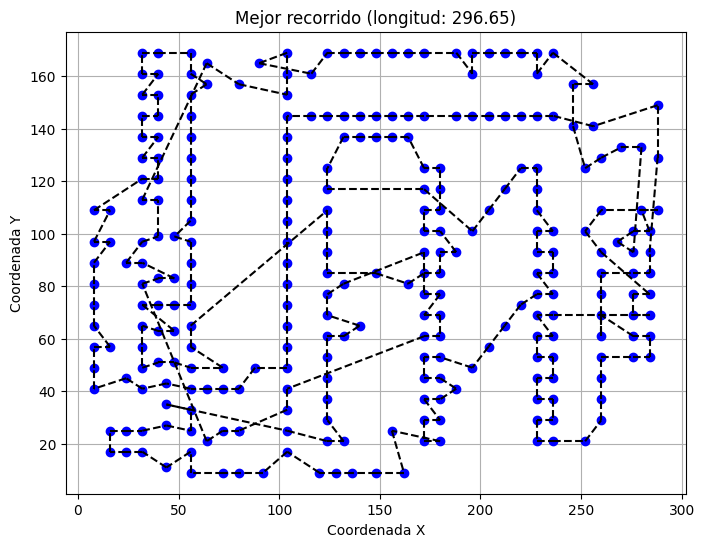

In [ ]:
# Prueba
nodos = load_instance('tsplib95/archives/problems/tsp/a280.tsp')

normalized_cities = normalize_coords(nodos)

np.random.seed(4)
start_time = time.time()
best_path, best_p_len, is_3d = colonia_de_hormigas(normalized_cities, alpha=2, beta=2, evaporation_rate=0.3, delta=0.5, max_iterations=100, n_ants=10)
end_time = time.time()

minutes, seconds = divmod(end_time - start_time, 60)
print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

denormalized_best_path = nodos[best_path]
real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

visualizar_caminos(nodos, best_path, real_best_p_len, is_3d)

## Experimento

Variables independientes:
- Número de hormigas (10, 20, 30...)
- Alpha (0.5, 1.0, 1.5...)
- Beta (0.5, 1.0, 1.5...)
- Rho o tasa de evaporación (0.1, 0.3, 0.5...)
- Delta (0.1, 0.3, 0.5...)
- Número de nodos (20, 50, 200...)
- Establecer el número máximo de iteraciones (1000, 2000)

Variables dependientes:
- GAP
- Iteraciones para estabilización
- Tiempo de ejecución

### Pruebas


Tiempo de ejecución del algoritmo: 0 minutos y 26.34 segundos
Parámetros: n_ants=10, alpha=0.5, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 46.3


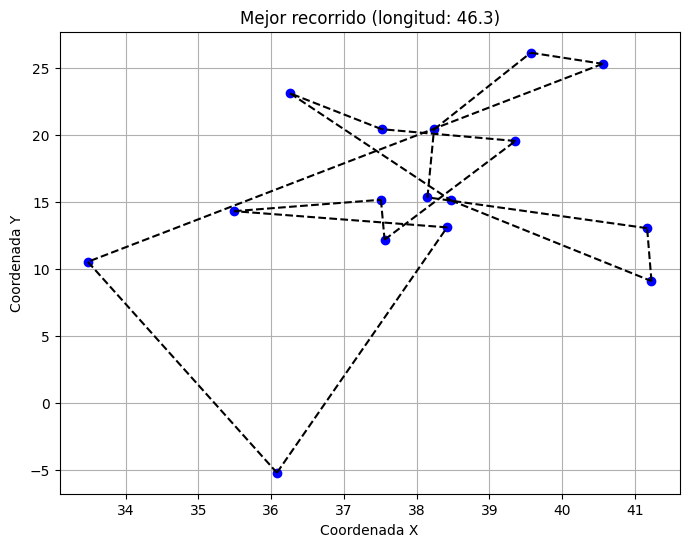

Tiempo de ejecución del algoritmo: 1 minutos y 1.82 segundos
Parámetros: n_ants=20, alpha=0.5, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 45.97


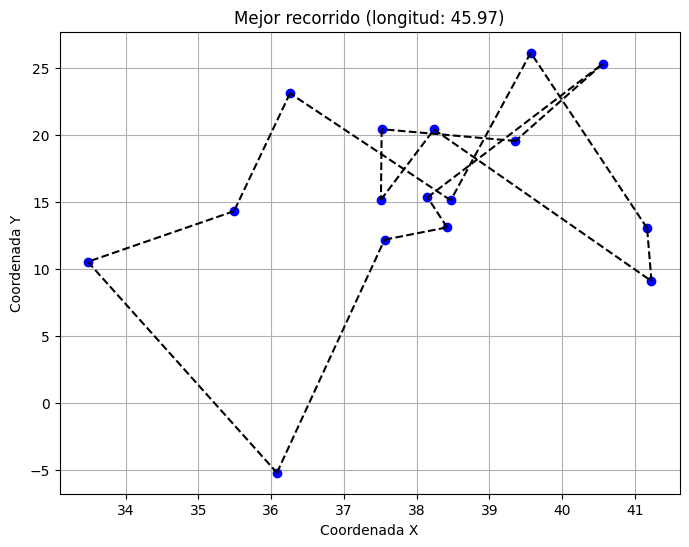

Tiempo de ejecución del algoritmo: 1 minutos y 16.56 segundos
Parámetros: n_ants=30, alpha=0.5, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 45.39


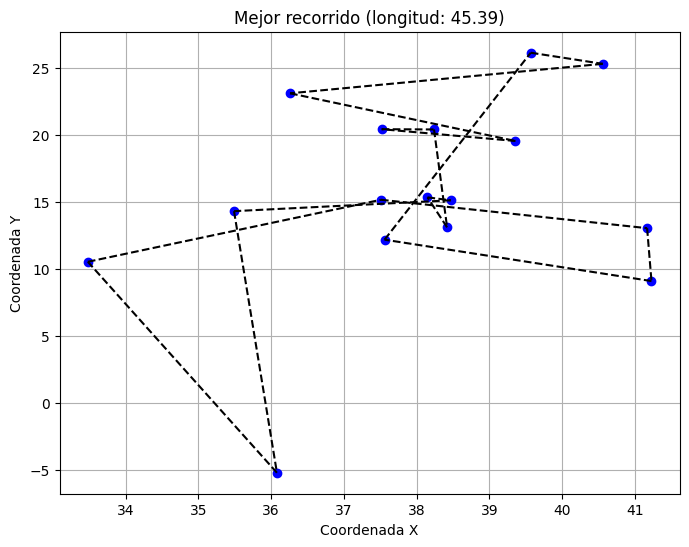

Parámetros mejor instancia: (30, 0.5, 0.5, 0.1, 0.1, 2000)
Longitud de la mejor instancia: 45.39


In [ ]:
# -----------------------------------------------------------------------------#
# Prueba Número de hormigas
# -----------------------------------------------------------------------------#
# Mejor resultado con 20 hormigas
# -----------------------------------------------------------------------------#

# Registro de resultados
experiment_results = []

# Registro mejor instancia
best_instance_params = None
best_instance_len = np.inf

# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# ------------------------------------------------------------------------------
# Parámetros:
n_ants = [10, 20, 30]
alpha = 0.5
beta = 0.5
evaporation_rate = 0.1
delta = 0.1
max_iterations = 2000

for ant in n_ants:
  # Proceso
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, ant)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Visualización
  print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")
  print(f"Parámetros: n_ants={ant}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}"
      f"\nLongitud del recorrido: {np.round(real_best_p_len, 2)}")
  visualizar_caminos(ulysses16, best_path, real_best_p_len, is_3d)

  # Actualizar mejor instancia
  if real_best_p_len < best_instance_len:
    best_instance_params = (ant, alpha, beta, evaporation_rate, delta, max_iterations)
    best_instance_len = real_best_p_len


print(f"Parámetros mejor instancia: {best_instance_params}")
print(f"Longitud de la mejor instancia: {np.round(best_instance_len, 2)}")

Tiempo de ejecución del algoritmo: 0 minutos y 48.87 segundos
Parámetros: n_ants=20, alpha=0.5, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 42.5


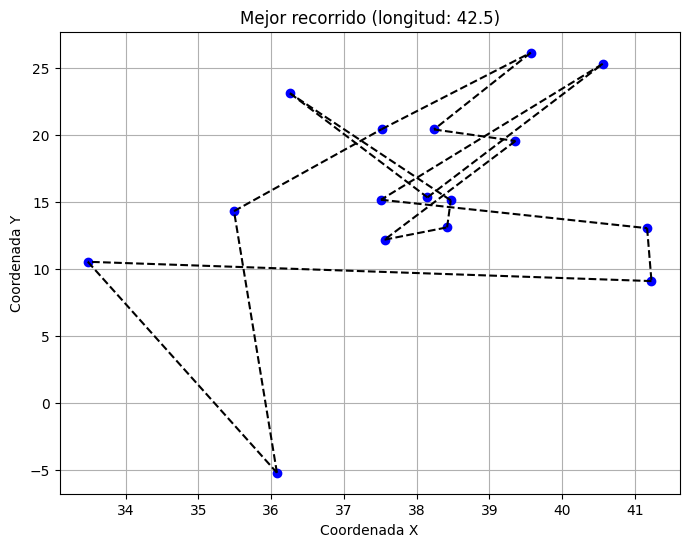

Tiempo de ejecución del algoritmo: 0 minutos y 49.97 segundos
Parámetros: n_ants=20, alpha=1, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 53.43


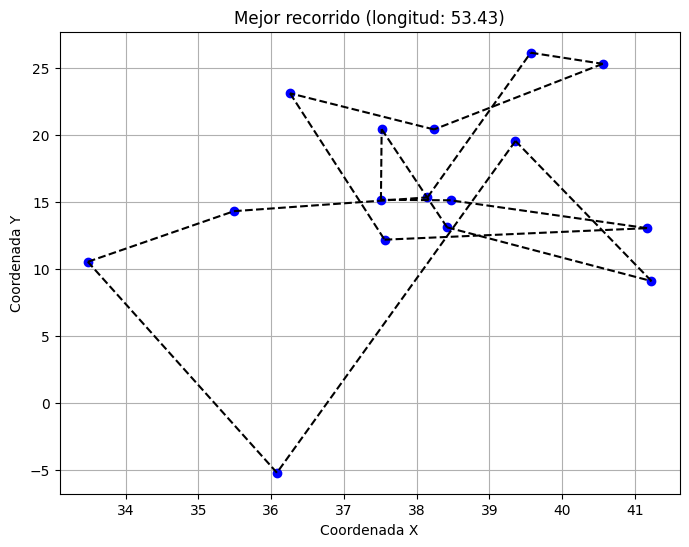

Tiempo de ejecución del algoritmo: 0 minutos y 47.23 segundos
Parámetros: n_ants=20, alpha=2, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 48.23


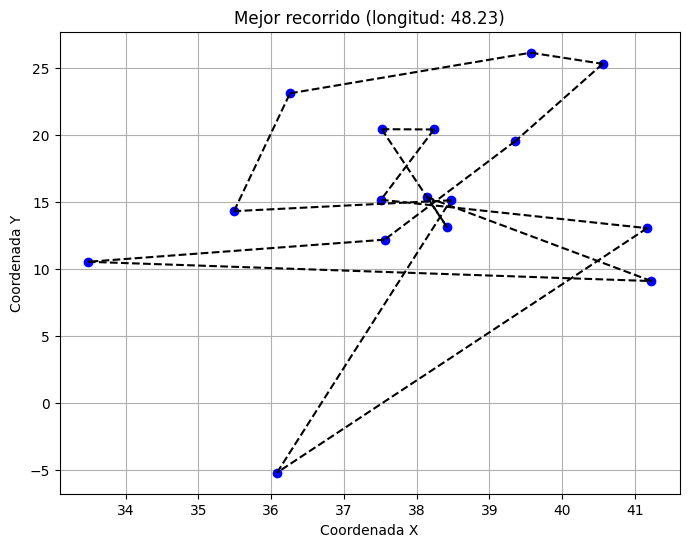

Parámetros mejor instancia: (20, 0.5, 0.5, 0.1, 0.1, 2000)
Longitud de la mejor instancia: 42.5


In [ ]:
# -----------------------------------------------------------------------------#
# Prueba alpha
# -----------------------------------------------------------------------------#
# Mejor resultado con alpha = 1
# -----------------------------------------------------------------------------#

# Registro de resultados
experiment_results = []

# Registro mejor instancia
best_instance_params = None
best_instance_len = np.inf

# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# ----------------------------------------------------------------------------------------------------------------------------
# Parámetros:
n_ants = 20
alphas = [0.5, 1, 2]
beta = 0.5
evaporation_rate = 0.1
delta = 0.1
max_iterations = 2000

for alpha in alphas:
  # Proceso
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Visualización
  print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")
  print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}"
      f"\nLongitud del recorrido: {np.round(real_best_p_len, 2)}")
  visualizar_caminos(ulysses16, best_path, real_best_p_len, is_3d)

  # Actualizar mejor instancia
  if real_best_p_len < best_instance_len:
      best_instance_params = (n_ants, alpha, beta, evaporation_rate, delta, max_iterations)
      best_instance_len = real_best_p_len

print(f"Parámetros mejor instancia: {best_instance_params}")
print(f"Longitud de la mejor instancia: {np.round(best_instance_len, 2)}")

Tiempo de ejecución del algoritmo: 0 minutos y 46.86 segundos
Parámetros: n_ants=20, alpha=0.5, beta=0.5, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 50.4


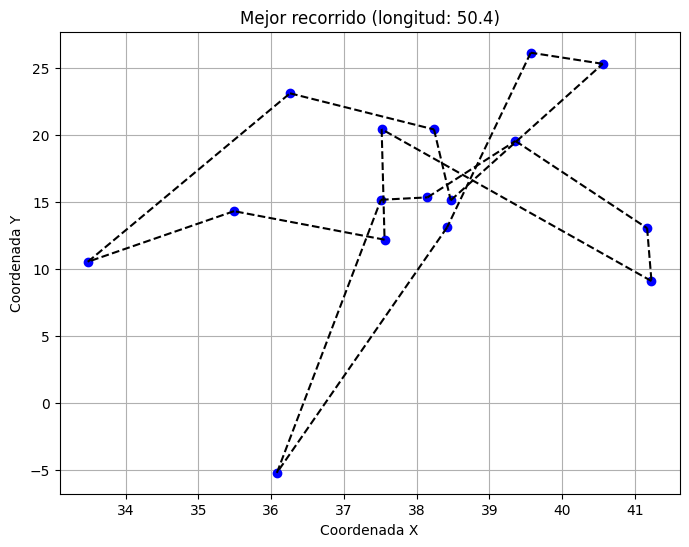

Tiempo de ejecución del algoritmo: 0 minutos y 46.13 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 65.38


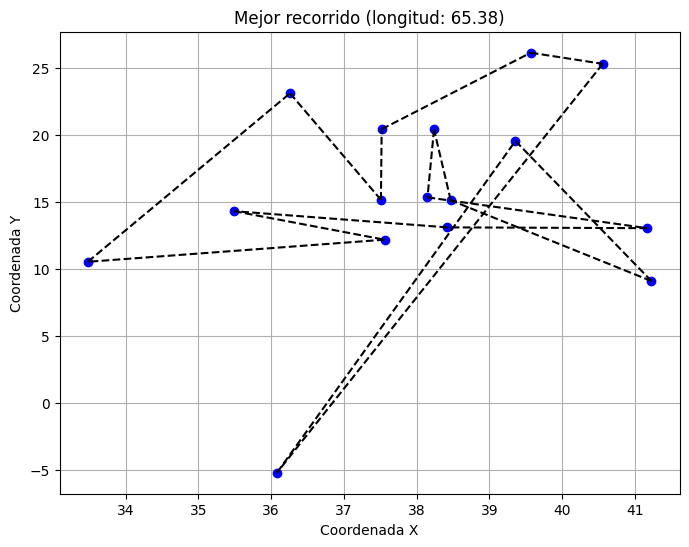

Tiempo de ejecución del algoritmo: 0 minutos y 46.90 segundos
Parámetros: n_ants=20, alpha=0.5, beta=2, evaporation_rate=0.1, delta=0.1, max_iterations=2000
Longitud del recorrido: 53.95


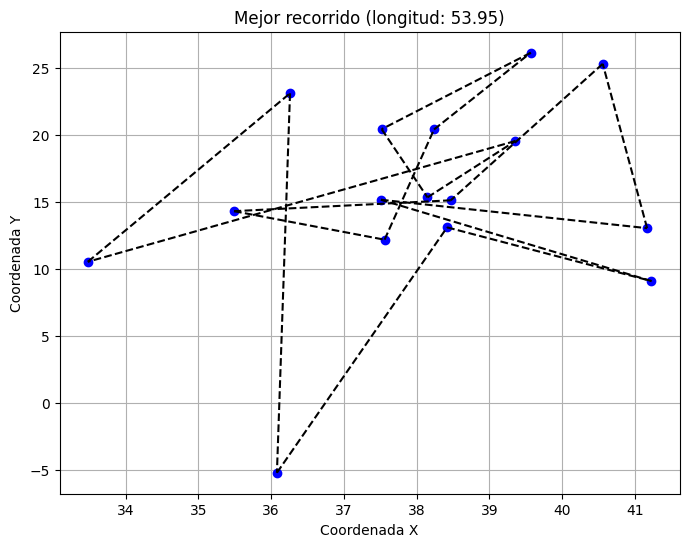

Parámetros mejor instancia: (20, 0.5, 0.5, 0.1, 0.1, 2000)
Longitud de la mejor instancia: 50.4


In [ ]:
# -----------------------------------------------------------------------------#
# Prueba beta
# -----------------------------------------------------------------------------#
# Mejor resultado con beta = 0.5
# -----------------------------------------------------------------------------#
# Registro de resultados
experiment_results = []

# Registro mejor instancia
best_instance_params = None
best_instance_len = np.inf

# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# ----------------------------------------------------------------------------------------------------------------------------
# Parámetros:
n_ants = 20
alpha = 0.5
betas = [0.5, 1, 2]
evaporation_rate = 0.1
delta = 0.1
max_iterations = 2000

for beta in betas:
  # Proceso
  np.random.seed(2)
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

# Visualización
  print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")
  print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}"
      f"\nLongitud del recorrido: {np.round(real_best_p_len, 2)}")
  visualizar_caminos(ulysses16, best_path, real_best_p_len, is_3d)

# Actualizar mejor instancia
  if real_best_p_len < best_instance_len:
      best_instance_params = (n_ants, alpha, beta, evaporation_rate, delta, max_iterations)
      best_instance_len = real_best_p_len

print(f"Parámetros mejor instancia: {best_instance_params}")
print(f"Longitud de la mejor instancia: {np.round(best_instance_len, 2)}")

Tiempo de ejecución del algoritmo: 0 minutos y 23.83 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.1, delta=0.1, max_iterations=1000
Longitud del recorrido: 51.52


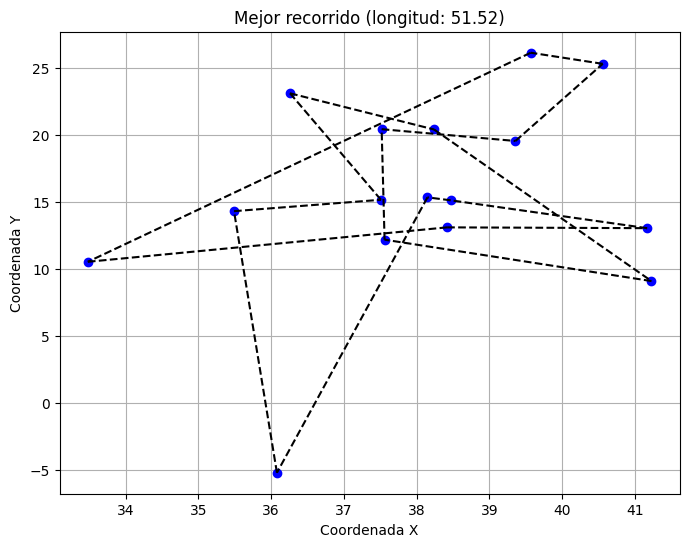

Tiempo de ejecución del algoritmo: 0 minutos y 23.56 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.3, delta=0.1, max_iterations=1000
Longitud del recorrido: 57.7


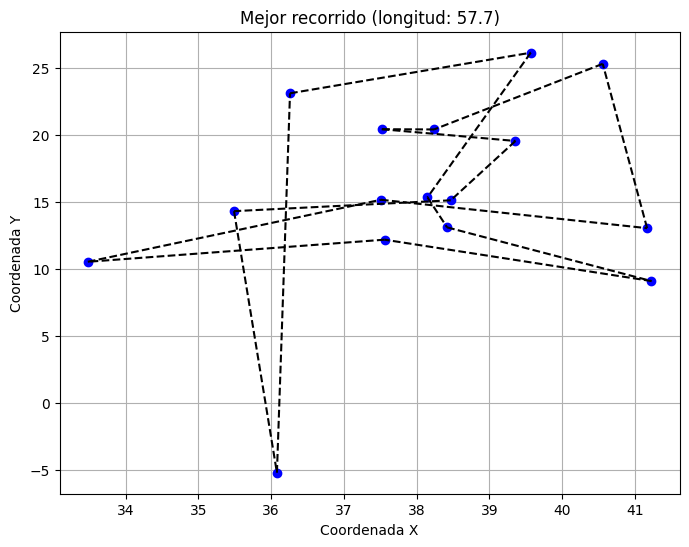

Tiempo de ejecución del algoritmo: 0 minutos y 23.80 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.5, delta=0.1, max_iterations=1000
Longitud del recorrido: 55.78


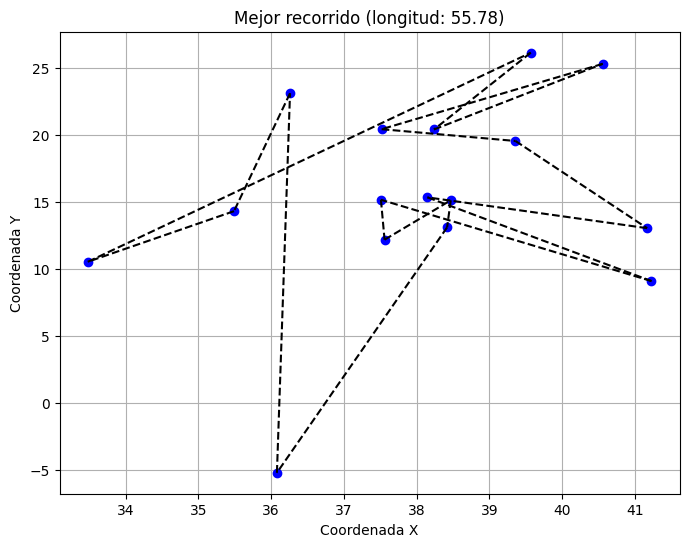

Parámetros mejor instancia: (20, 0.5, 1, 0.1, 0.1, 1000)
Longitud de la mejor instancia: 51.52


In [ ]:
# -----------------------------------------------------------------------------#
# Prueba evaporation_rate
# -----------------------------------------------------------------------------#
# Mejor resultado con evaporation_rate = 0.3
# -----------------------------------------------------------------------------#
# Registro de resultados
experiment_results = []

# Registro mejor instancia
best_instance_params = None
best_instance_len = np.inf

# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# ----------------------------------------------------------------------------------------------------------------------------
# Parámetros:
n_ants = 20
alpha = 0.5
beta = 1
evaporation_rates = [0.1, 0.3, 0.5]
delta = 0.1
max_iterations = 1000

for evaporation_rate in evaporation_rates:
  # Proceso
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Visualización
  print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")
  print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}"
      f"\nLongitud del recorrido: {np.round(real_best_p_len, 2)}")
  visualizar_caminos(ulysses16, best_path, real_best_p_len, is_3d)

  # Actualizar mejor instancia
  if real_best_p_len < best_instance_len:
    best_instance_params = (n_ants, alpha, beta, evaporation_rate, delta, max_iterations)
    best_instance_len = real_best_p_len

print(f"Parámetros mejor instancia: {best_instance_params}")
print(f"Longitud de la mejor instancia: {np.round(best_instance_len, 2)}")

Tiempo de ejecución del algoritmo: 0 minutos y 23.20 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.3, delta=0.1, max_iterations=1000
Longitud del recorrido: 50.88


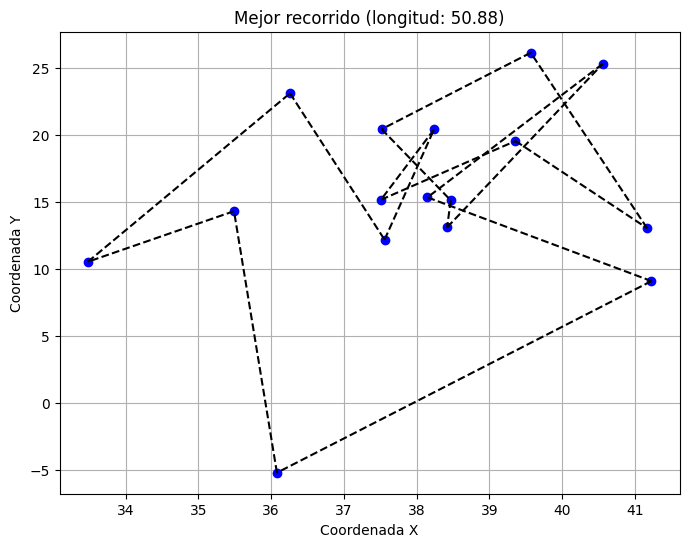

Tiempo de ejecución del algoritmo: 0 minutos y 22.14 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.3, delta=0.3, max_iterations=1000
Longitud del recorrido: 39.33


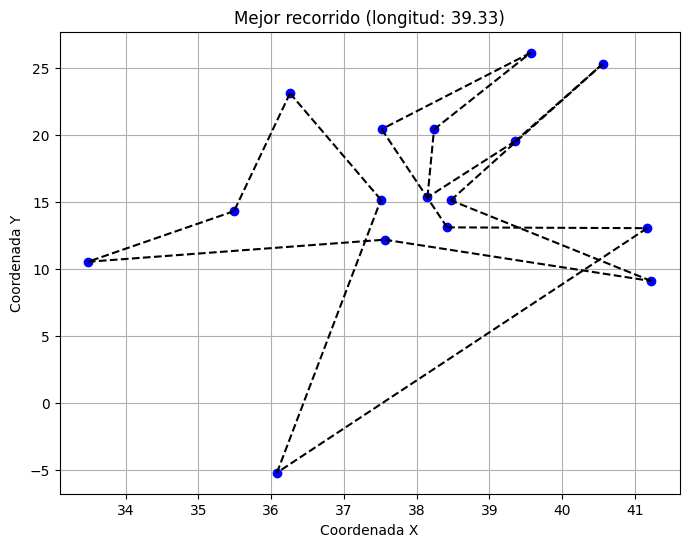

Tiempo de ejecución del algoritmo: 0 minutos y 23.41 segundos
Parámetros: n_ants=20, alpha=0.5, beta=1, evaporation_rate=0.3, delta=0.5, max_iterations=1000
Longitud del recorrido: 61.66


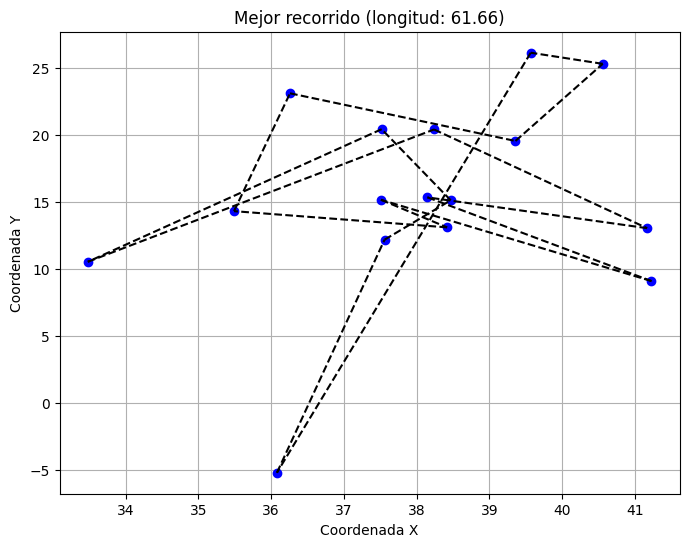

Parámetros mejor instancia: (20, 0.5, 1, 0.3, 0.3, 1000)
Longitud de la mejor instancia: 39.33


In [ ]:
# -----------------------------------------------------------------------------#
# Prueba delta
# -----------------------------------------------------------------------------#
# Mejor resultado con delta = 0.3
# -----------------------------------------------------------------------------#
# Registro de resultados
experiment_results = []

# Registro mejor instancia
best_instance_params = None
best_instance_len = np.inf

# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# ----------------------------------------------------------------------------------------------------------------------------
# Parámetros:
n_ants = 20
alpha = 0.5
beta = 1
evaporation_rate = 0.3
deltas = [0.1, 0.3, 0.5]
max_iterations = 1000

for delta in deltas:
  # Proceso
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Visualización
  print(f"Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")
  print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}"
      f"\nLongitud del recorrido: {np.round(real_best_p_len, 2)}")
  visualizar_caminos(ulysses16, best_path, real_best_p_len, is_3d)

  # Actualizar mejor instancia
  if real_best_p_len < best_instance_len:
    best_instance_params = (n_ants, alpha, beta, evaporation_rate, delta, max_iterations)
    best_instance_len = real_best_p_len

print(f"Parámetros mejor instancia: {best_instance_params}")
print(f"Longitud de la mejor instancia: {np.round(best_instance_len, 2)}")

In [ ]:
# -----------------------------------------------------------------------------#
# Pruebas con semillas
# -----------------------------------------------------------------------------#
# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# Configuración de parámetros y lista de semillas
n_ulysses16 = normalize_coords(ulysses16)
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
experiment_results = []

# Parámetros a probar
n_ants = 20
alpha = 0.5
beta = 0.5
evaporation_rate = 0.3
delta = 0.3
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)

# Calcular estadísticas para esta combinación de parámetros
print(results_for_seeds)
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media del mejor camino: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

[54.71488752658176, 44.77491757729762, 55.36422789975907, 56.36288964581372, 54.23083494018647, 46.13306401897103, 57.70582045892256, 47.33841263059062, 54.148492386036025, 45.561988642150894]
Parámetros: n_ants=20, alpha=0.5, beta=0.5, evaporation_rate=0.3, delta=0.3, max_iterations=2000
Longitud media del mejor camino: 51.63, Desviación estándar: 4.78


In [ ]:
# -----------------------------------------------------------------------------#
# Pruebas con semillas
# -----------------------------------------------------------------------------#
# Instancia
burma14 = load_instance('tsplib95/archives/problems/tsp/burma14.tsp')
n_burma14 = normalize_coords(burma14)

# Configuración de parámetros y lista de semillas
n_burma14 = normalize_coords(burma14)
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
experiment_results = []

# Parámetros a probar
n_ants = 20
alpha = 0.5
beta = 0.5
evaporation_rate = 0.3
delta = 0.3
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_burma14, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = burma14[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)

# Calcular estadísticas para esta combinación de parámetros
print(results_for_seeds)
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media del mejor camino: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

[16.25351287832692, 17.394056501329853, 19.216314436456155, 18.562264001845833, 15.249281429410283, 16.594185570530883, 18.030558732751455, 13.918807852971993, 13.557262258964446, 17.059100682651057]
Parámetros: n_ants=20, alpha=0.5, beta=0.5, evaporation_rate=0.3, delta=0.3, max_iterations=2000
Longitud media del mejor camino: 16.58, Desviación estándar: 1.79


In [ ]:
# -----------------------------------------------------------------------------#
# Pruebas con semillas
# -----------------------------------------------------------------------------#
# Instancia
a280 = load_instance('tsplib95/archives/problems/tsp/a280.tsp')
n_a280 = normalize_coords(a280)

# Configuración de parámetros y lista de semillas
n_a280 = normalize_coords(a280)
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
experiment_results = []

# Parámetros a probar
n_ants = 20
alpha = 0.5
beta = 0.5
evaporation_rate = 0.3
delta = 0.3
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_a280, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = a280[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)

# Calcular estadísticas para esta combinación de parámetros
print(results_for_seeds)
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media del mejor camino: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

### Ciudades pequeñas

Se eligieron: ulysses16, burma14 y ulysses22.

### ulysses16

Semilla 0: Longitud del mejor camino: 80.20, Tiempo de ejecución del algoritmo: 0 minutos y 40.28 segundos
Semilla 1: Longitud del mejor camino: 91.71, Tiempo de ejecución del algoritmo: 0 minutos y 39.45 segundos
Semilla 2: Longitud del mejor camino: 88.51, Tiempo de ejecución del algoritmo: 0 minutos y 40.55 segundos
Semilla 3: Longitud del mejor camino: 89.23, Tiempo de ejecución del algoritmo: 0 minutos y 29.81 segundos
Semilla 4: Longitud del mejor camino: 86.71, Tiempo de ejecución del algoritmo: 0 minutos y 35.90 segundos
Semilla 5: Longitud del mejor camino: 82.41, Tiempo de ejecución del algoritmo: 0 minutos y 29.64 segundos
Semilla 6: Longitud del mejor camino: 89.21, Tiempo de ejecución del algoritmo: 0 minutos y 30.19 segundos
Semilla 7: Longitud del mejor camino: 86.71, Tiempo de ejecución del algoritmo: 0 minutos y 29.57 segundos
Semilla 8: Longitud del mejor camino: 75.42, Tiempo de ejecución del algoritmo: 0 minutos y 29.49 segundos
Semilla 9: Longitud del mejor camino:

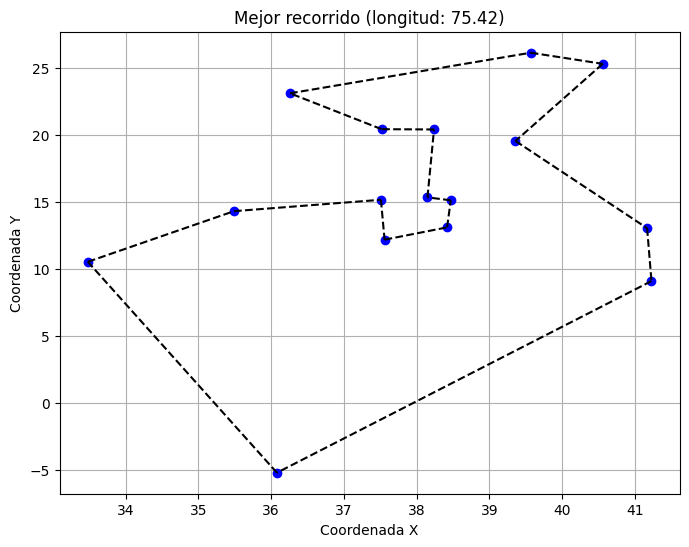

Mejor longitud obtenida: 75.42 con la semilla: 8


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
ulysses16 = load_instance('tsplib95/archives/problems/tsp/ulysses16.tsp')
n_ulysses16 = normalize_coords(ulysses16)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses16, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = ulysses16[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(ulysses16, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### burma14

Semilla 0: Longitud del mejor camino: 38.11, Tiempo de ejecución del algoritmo: 0 minutos y 26.33 segundos
Semilla 1: Longitud del mejor camino: 37.76, Tiempo de ejecución del algoritmo: 0 minutos y 26.05 segundos
Semilla 2: Longitud del mejor camino: 32.57, Tiempo de ejecución del algoritmo: 0 minutos y 25.97 segundos
Semilla 3: Longitud del mejor camino: 38.11, Tiempo de ejecución del algoritmo: 0 minutos y 26.09 segundos
Semilla 4: Longitud del mejor camino: 34.31, Tiempo de ejecución del algoritmo: 0 minutos y 25.74 segundos
Semilla 5: Longitud del mejor camino: 38.05, Tiempo de ejecución del algoritmo: 0 minutos y 25.93 segundos
Semilla 6: Longitud del mejor camino: 33.33, Tiempo de ejecución del algoritmo: 0 minutos y 30.43 segundos
Semilla 7: Longitud del mejor camino: 37.76, Tiempo de ejecución del algoritmo: 0 minutos y 30.60 segundos
Semilla 8: Longitud del mejor camino: 37.76, Tiempo de ejecución del algoritmo: 0 minutos y 32.62 segundos
Semilla 9: Longitud del mejor camino:

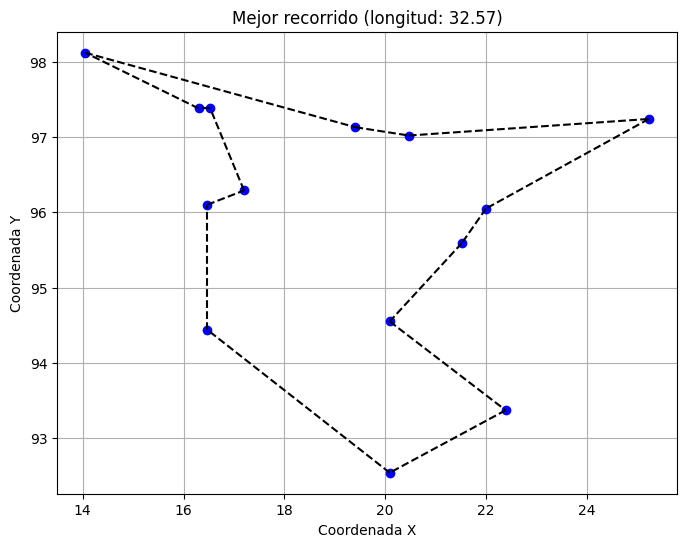

Mejor longitud obtenida: 32.57 con la semilla: 2


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
burma14 = load_instance('tsplib95/archives/problems/tsp/burma14.tsp')
n_burma14 = normalize_coords(burma14)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_burma14, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = burma14[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(burma14, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### ulysses22

Semilla 0: Longitud del mejor camino: 77.89, Tiempo de ejecución del algoritmo: 0 minutos y 41.61 segundos
Semilla 1: Longitud del mejor camino: 81.63, Tiempo de ejecución del algoritmo: 0 minutos y 41.29 segundos
Semilla 2: Longitud del mejor camino: 93.63, Tiempo de ejecución del algoritmo: 0 minutos y 41.57 segundos
Semilla 3: Longitud del mejor camino: 81.93, Tiempo de ejecución del algoritmo: 0 minutos y 42.05 segundos
Semilla 4: Longitud del mejor camino: 96.43, Tiempo de ejecución del algoritmo: 0 minutos y 45.71 segundos
Semilla 5: Longitud del mejor camino: 83.24, Tiempo de ejecución del algoritmo: 0 minutos y 41.37 segundos
Semilla 6: Longitud del mejor camino: 84.50, Tiempo de ejecución del algoritmo: 0 minutos y 42.31 segundos
Semilla 7: Longitud del mejor camino: 91.08, Tiempo de ejecución del algoritmo: 0 minutos y 41.21 segundos
Semilla 8: Longitud del mejor camino: 81.62, Tiempo de ejecución del algoritmo: 0 minutos y 41.33 segundos
Semilla 9: Longitud del mejor camino:

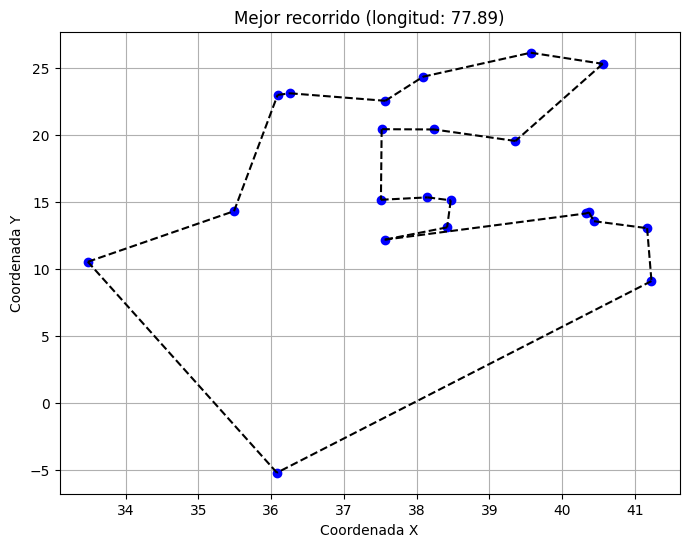

Mejor longitud obtenida: 77.89 con la semilla: 0


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
ulysses22 = load_instance('tsplib95/archives/problems/tsp/ulysses22.tsp')
n_ulysses22 = normalize_coords(ulysses22)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_ulysses22, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = ulysses22[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(ulysses22, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### Ciudades medianas

Se eligieron: berlin52, pr76 y kroA100.

### berlin52

Semilla 0: Longitud del mejor camino: 8843.87, Tiempo de ejecución del algoritmo: 1 minutos y 40.38 segundos
Semilla 1: Longitud del mejor camino: 8599.25, Tiempo de ejecución del algoritmo: 1 minutos y 59.75 segundos
Semilla 2: Longitud del mejor camino: 9574.39, Tiempo de ejecución del algoritmo: 2 minutos y 24.34 segundos
Semilla 3: Longitud del mejor camino: 9448.30, Tiempo de ejecución del algoritmo: 1 minutos y 53.27 segundos
Semilla 4: Longitud del mejor camino: 9320.22, Tiempo de ejecución del algoritmo: 1 minutos y 40.77 segundos
Semilla 5: Longitud del mejor camino: 8864.99, Tiempo de ejecución del algoritmo: 1 minutos y 40.34 segundos
Semilla 6: Longitud del mejor camino: 8662.33, Tiempo de ejecución del algoritmo: 2 minutos y 19.49 segundos
Semilla 7: Longitud del mejor camino: 9133.57, Tiempo de ejecución del algoritmo: 1 minutos y 57.36 segundos
Semilla 8: Longitud del mejor camino: 8846.70, Tiempo de ejecución del algoritmo: 1 minutos y 41.17 segundos
Semilla 9: Longitud

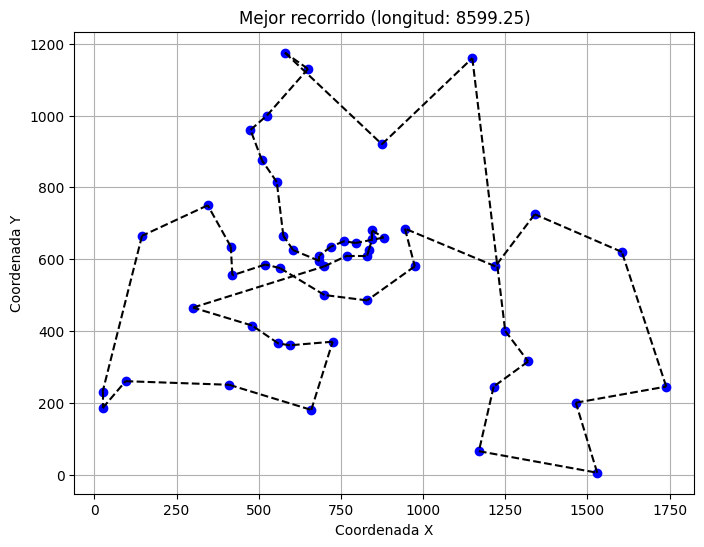

Mejor longitud obtenida: 8599.25 con la semilla: 1


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
berlin52 = load_instance('tsplib95/archives/problems/tsp/berlin52.tsp')
n_berlin52 = normalize_coords(berlin52)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_berlin52, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = berlin52[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(berlin52, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### pr76

Semilla 0: Longitud del mejor camino: 147484.35, Tiempo de ejecución del algoritmo: 2 minutos y 30.85 segundos
Semilla 1: Longitud del mejor camino: 133946.53, Tiempo de ejecución del algoritmo: 2 minutos y 31.08 segundos
Semilla 2: Longitud del mejor camino: 138818.71, Tiempo de ejecución del algoritmo: 2 minutos y 31.88 segundos
Semilla 3: Longitud del mejor camino: 129968.70, Tiempo de ejecución del algoritmo: 2 minutos y 29.69 segundos
Semilla 4: Longitud del mejor camino: 133469.45, Tiempo de ejecución del algoritmo: 2 minutos y 29.87 segundos
Semilla 5: Longitud del mejor camino: 139671.52, Tiempo de ejecución del algoritmo: 2 minutos y 28.56 segundos
Semilla 6: Longitud del mejor camino: 144937.91, Tiempo de ejecución del algoritmo: 2 minutos y 30.10 segundos
Semilla 7: Longitud del mejor camino: 131535.64, Tiempo de ejecución del algoritmo: 2 minutos y 30.23 segundos
Semilla 8: Longitud del mejor camino: 132949.27, Tiempo de ejecución del algoritmo: 2 minutos y 28.89 segundos
S

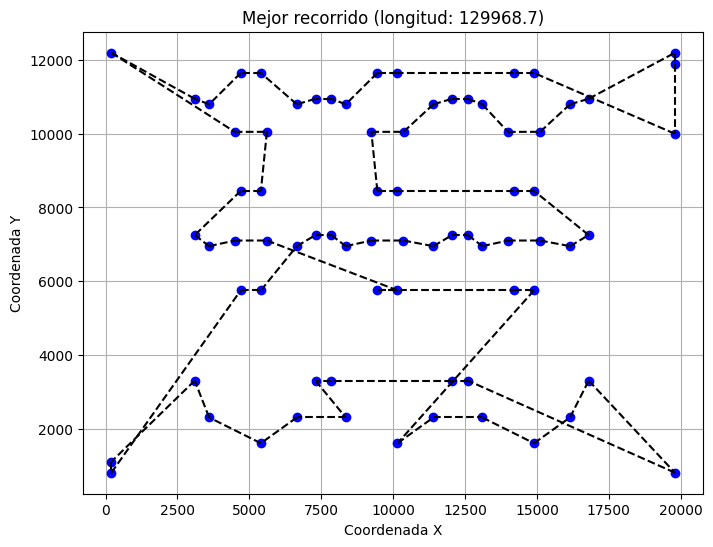

Mejor longitud obtenida: 129968.70 con la semilla: 3


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
pr76 = load_instance('tsplib95/archives/problems/tsp/pr76.tsp')
n_pr76 = normalize_coords(pr76)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_pr76, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = pr76[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(pr76, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### kroA100

Semilla 0: Longitud del mejor camino: 28504.80, Tiempo de ejecución del algoritmo: 3 minutos y 18.34 segundos
Semilla 1: Longitud del mejor camino: 26243.76, Tiempo de ejecución del algoritmo: 3 minutos y 17.34 segundos
Semilla 2: Longitud del mejor camino: 26960.73, Tiempo de ejecución del algoritmo: 3 minutos y 18.51 segundos
Semilla 3: Longitud del mejor camino: 28270.17, Tiempo de ejecución del algoritmo: 3 minutos y 15.72 segundos
Semilla 4: Longitud del mejor camino: 26868.45, Tiempo de ejecución del algoritmo: 3 minutos y 18.07 segundos
Semilla 5: Longitud del mejor camino: 27160.13, Tiempo de ejecución del algoritmo: 3 minutos y 18.00 segundos
Semilla 6: Longitud del mejor camino: 26531.85, Tiempo de ejecución del algoritmo: 3 minutos y 18.39 segundos
Semilla 7: Longitud del mejor camino: 26507.80, Tiempo de ejecución del algoritmo: 3 minutos y 18.77 segundos
Semilla 8: Longitud del mejor camino: 27141.84, Tiempo de ejecución del algoritmo: 3 minutos y 18.56 segundos
Semilla 9:

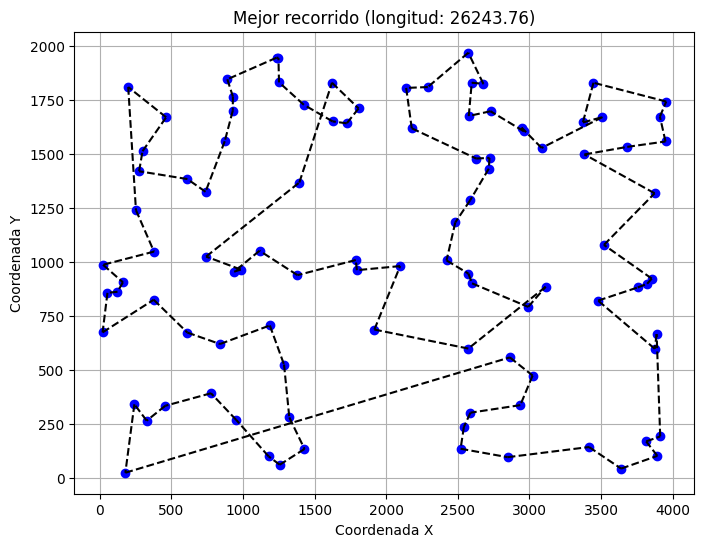

Mejor longitud obtenida: 26243.76 con la semilla: 1


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
kroA100 = load_instance('tsplib95/archives/problems/tsp/kroA100.tsp')
n_kroA100 = normalize_coords(kroA100)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_kroA100, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = kroA100[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(kroA100, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### Ciudades grandes

Se eligieron: u159, gil262 y a280.

### u159

Semilla 0: Longitud del mejor camino: 52966.08, Tiempo de ejecución del algoritmo: 5 minutos y 24.24 segundos
Semilla 1: Longitud del mejor camino: 48806.51, Tiempo de ejecución del algoritmo: 5 minutos y 25.12 segundos
Semilla 2: Longitud del mejor camino: 49232.95, Tiempo de ejecución del algoritmo: 5 minutos y 24.70 segundos
Semilla 3: Longitud del mejor camino: 48914.43, Tiempo de ejecución del algoritmo: 5 minutos y 23.96 segundos
Semilla 4: Longitud del mejor camino: 49092.31, Tiempo de ejecución del algoritmo: 5 minutos y 23.64 segundos
Semilla 5: Longitud del mejor camino: 51706.55, Tiempo de ejecución del algoritmo: 5 minutos y 23.71 segundos
Semilla 6: Longitud del mejor camino: 52441.61, Tiempo de ejecución del algoritmo: 5 minutos y 24.30 segundos
Semilla 7: Longitud del mejor camino: 50460.01, Tiempo de ejecución del algoritmo: 5 minutos y 24.09 segundos
Semilla 8: Longitud del mejor camino: 50853.87, Tiempo de ejecución del algoritmo: 5 minutos y 25.07 segundos
Semilla 9:

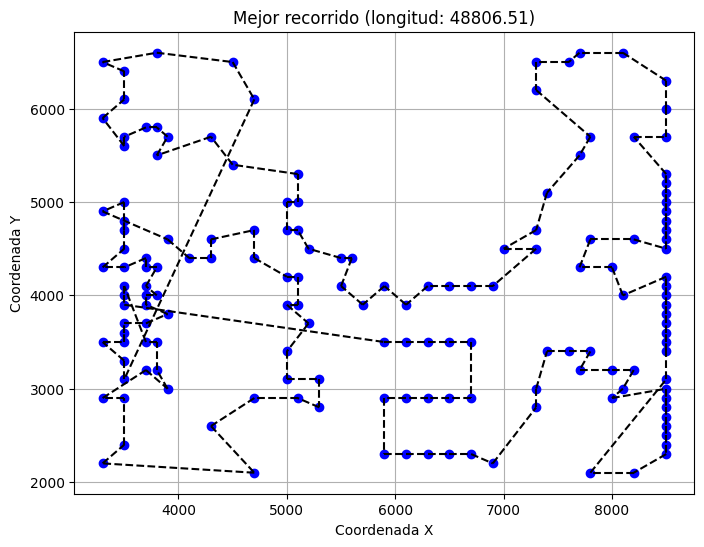

Mejor longitud obtenida: 48806.51 con la semilla: 1


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
u159 = load_instance('tsplib95/archives/problems/tsp/u159.tsp')
n_u159 = normalize_coords(u159)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_u159, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = u159[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(u159, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### gil262

Semilla 0: Longitud del mejor camino: 3048.93, Tiempo de ejecución del algoritmo: 9 minutos y 24.57 segundos
Semilla 1: Longitud del mejor camino: 3053.54, Tiempo de ejecución del algoritmo: 9 minutos y 24.62 segundos
Semilla 2: Longitud del mejor camino: 2894.63, Tiempo de ejecución del algoritmo: 9 minutos y 24.52 segundos
Semilla 3: Longitud del mejor camino: 2986.52, Tiempo de ejecución del algoritmo: 9 minutos y 22.74 segundos
Semilla 4: Longitud del mejor camino: 2848.54, Tiempo de ejecución del algoritmo: 9 minutos y 23.36 segundos
Semilla 5: Longitud del mejor camino: 2867.64, Tiempo de ejecución del algoritmo: 9 minutos y 22.44 segundos
Semilla 6: Longitud del mejor camino: 3066.97, Tiempo de ejecución del algoritmo: 9 minutos y 23.90 segundos
Semilla 7: Longitud del mejor camino: 3107.54, Tiempo de ejecución del algoritmo: 9 minutos y 23.82 segundos
Semilla 8: Longitud del mejor camino: 2970.22, Tiempo de ejecución del algoritmo: 9 minutos y 22.94 segundos
Semilla 9: Longitud

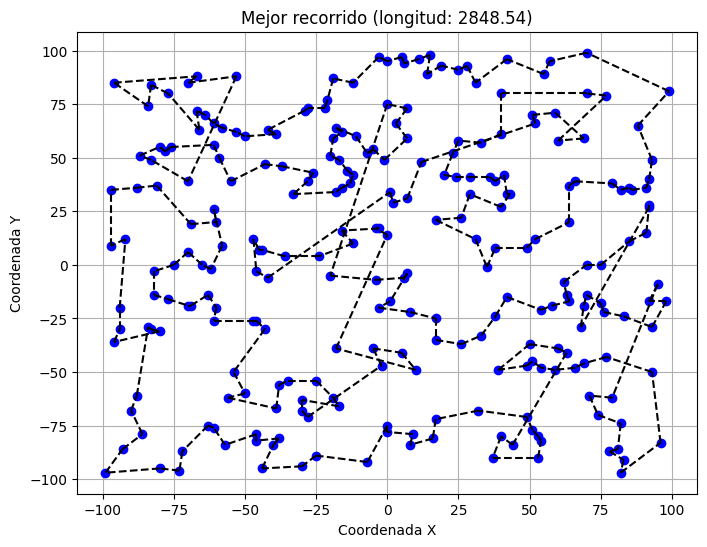

Mejor longitud obtenida: 2848.54 con la semilla: 4


In [ ]:
# -----------------------------------------------------------------------------
# Pruebas con semillas
# -----------------------------------------------------------------------------
# Instancia
gil262 = load_instance('tsplib95/archives/problems/tsp/gil262.tsp')
n_gil262 = normalize_coords(gil262)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
best_results = None  # Almacenará el mejor resultado global

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_gil262, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = gil262[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0), axis=1).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Actualizar el mejor resultado global si es el mejor camino encontrado
  if best_results is None or real_best_p_len < best_results['length']:
    best_results = {
      'path': best_path,
      'length': real_best_p_len,
      'seed': seed
    }

# Calcular estadísticas para esta combinación de parámetros
mean_len = np.mean(results_for_seeds)
std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(gil262, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")

### a280

Semilla 0: Longitud del mejor camino: 441.87, Tiempo de ejecución del algoritmo: 10 minutos y 5.11 segundos
Semilla 1: Longitud del mejor camino: 348.31, Tiempo de ejecución del algoritmo: 10 minutos y 4.96 segundos
Semilla 2: Longitud del mejor camino: 385.01, Tiempo de ejecución del algoritmo: 10 minutos y 6.87 segundos
Semilla 3: Longitud del mejor camino: 429.73, Tiempo de ejecución del algoritmo: 10 minutos y 4.53 segundos
Semilla 4: Longitud del mejor camino: 375.81, Tiempo de ejecución del algoritmo: 10 minutos y 5.06 segundos
Semilla 5: Longitud del mejor camino: 499.95, Tiempo de ejecución del algoritmo: 10 minutos y 4.63 segundos
Semilla 6: Longitud del mejor camino: 391.18, Tiempo de ejecución del algoritmo: 10 minutos y 4.21 segundos
Semilla 7: Longitud del mejor camino: 290.65, Tiempo de ejecución del algoritmo: 10 minutos y 3.18 segundos
Semilla 8: Longitud del mejor camino: 386.69, Tiempo de ejecución del algoritmo: 10 minutos y 2.19 segundos
Semilla 9: Longitud del mejo

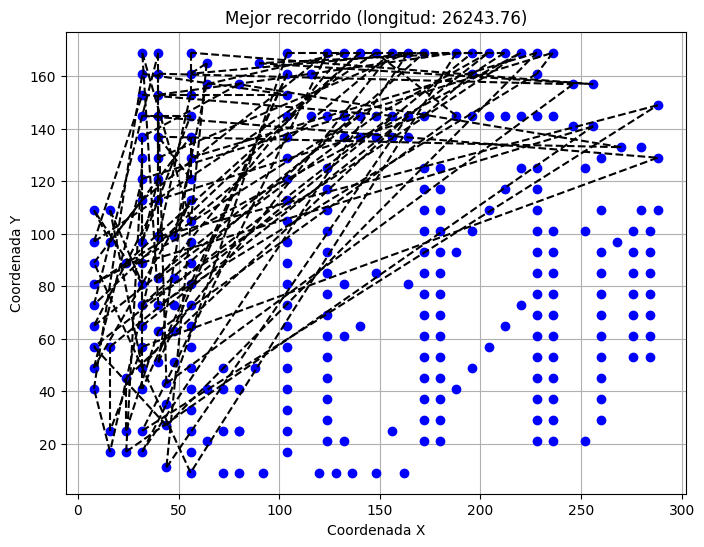

Mejor longitud obtenida: 26243.76 con la semilla: 1


In [ ]:
# -----------------------------------------------------------------------------#
# Pruebas con semillas
# -----------------------------------------------------------------------------#
# Instancia
a280 = load_instance('tsplib95/archives/problems/tsp/a280.tsp')
n_a280 = normalize_coords(a280)

# Configuración de parámetros y lista de semillas
seeds = range(10)  # Repetir cada experimento 10 veces con diferentes semillas
experiment_results = []

# Parámetros a probar
n_ants = 20
alpha = 2
beta = 2
evaporation_rate = 0.3
delta = 0.5
max_iterations = 2000

# Repetir el experimento para cada semilla
results_for_seeds = []
for seed in seeds:
  np.random.seed(seed)  # Fijar la semilla para la repetición

  # Ejecutar el algoritmo
  start_time = time.time()
  best_path, best_p_len, is_3d = colonia_de_hormigas(n_a280, alpha, beta, evaporation_rate, delta, max_iterations, n_ants)
  end_time = time.time()
  minutes, seconds = divmod(end_time - start_time, 60)

  # Desnormalización y cálculo de longitud real del mejor camino
  denormalized_best_path = a280[best_path]
  real_best_p_len = np.linalg.norm(np.diff(denormalized_best_path, axis=0)).sum() + np.linalg.norm(denormalized_best_path[0] - denormalized_best_path[-1])

  # Almacenar resultado de esta ejecución
  results_for_seeds.append(real_best_p_len)
  print(f"Semilla {seed}: Longitud del mejor camino: {real_best_p_len:.2f}, Tiempo de ejecución del algoritmo: {int(minutes)} minutos y {seconds:.2f} segundos")

  # Calcular estadísticas para esta combinación de parámetros
  mean_len = np.mean(results_for_seeds)
  std_len = np.std(results_for_seeds)

print(f"Parámetros: n_ants={n_ants}, alpha={alpha}, beta={beta}, "
      f"evaporation_rate={evaporation_rate}, delta={delta}, max_iterations={max_iterations}")
print(f"Longitud media: {mean_len:.2f}, Desviación estándar: {std_len:.2f}")

visualizar_caminos(a280, best_results['path'], best_results['length'], is_3d)
print(f"Mejor longitud obtenida: {best_results['length']:.2f} con la semilla: {best_results['seed']}")